# DOMAIN: Startup ecosystem

### CONTEXT: Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the business related to technology news, analysis of emerging trends and profiling of new tech businesses and products. Their event i.e. Startup Battlefield is the world’s pre-eminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience, present in person and online.

* DATA DESCRIPTION: CompanyX_EU.csv - Each row in the dataset is a Start-up company and the columns describe the company. ATTRIBUTE

#### INFORMATION:
1. Startup: Name of the company
2. Product: Actual product
3. Funding: Funds raised by the company in USD
4. Event: The event the company participated in
5. Result: Described by Contestant, Finalist, Audience choice, Winner or Runner up
6. OperatingState: Current status of the company, Operating ,Closed, Acquired or IPO
7. Dataset has been downloaded from the internet. All the credit for the dataset goes to the original creator of the data.

In [377]:
# import necessary packages

# for data handling
import numpy as np
import pandas as pd

# for plots and visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for inferential statistics
import scipy.stats as stats

## Data Warehouse
#### Read the CSV file

In [378]:
# read the csv file

startup_data = pd.read_csv('CompanyX_EU.csv')

## Data Exploration
#### 1. Check the datatypes of each attribute.
#### 2. Check the null values in the attributes

In [379]:
# data information- check data types
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


In [380]:
# check for the null values

startup_data.isnull().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

## Data Exploration

#### 1. Drop the null values.
#### 2. Convert the ‘Funding’ features to a numerical value.
#### 3. Plot box plot for funds in million.
#### 4. Get the lower fence from the box plot.
#### 5. Check number of outliers greater than upper fence.
#### 6. Drop the values that are greater than upper fence.
#### 7. Plot the box plot after dropping the values.
#### 8. Check frequency of the OperatingState features classes.
#### 9. Plot a distribution plot for Funds in million.
#### 10. Plot distribution plots for companies still operating and companies that closed.

In [381]:
# drop the null values

startup_data = startup_data.dropna()
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 1 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         446 non-null    object
 1   Product         446 non-null    object
 2   Funding         446 non-null    object
 3   Event           446 non-null    object
 4   Result          446 non-null    object
 5   OperatingState  446 non-null    object
dtypes: object(6)
memory usage: 24.4+ KB


In [382]:
# check null values
startup_data.isnull().sum()

Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64

In [383]:
# lets check the column 'Funding'
startup_data['Funding'].head()

1      $630K
3        $1M
5     $19.3M
6       $29M
10     $1.8M
Name: Funding, dtype: object

In [384]:
# create a user defined function to convert currency into numeric data types

def convert_currency(x):
    y = x.replace('$','')
    if y[-1:] == 'K':
        j = float(y.replace('K',''))*1000
    elif y[-1:] == 'M':
        j = float(y.replace('M',''))*1000000
    elif y[-1:] == 'B':
        j = float(y.replace('B',''))*1000000000
    else:
        j = float(y)
    
    return j

In [385]:
startup_data['new_Funding'] = startup_data['Funding'].apply(convert_currency)

In [386]:
startup_data['Funds_in_Million'] = startup_data['new_Funding']/1000000

In [387]:
startup_data = startup_data.reset_index()

In [388]:
startup_data

,index,Startup,Product,Funding,Event,Result,OperatingState,new_Funding,Funds_in_Million
0,1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,630000.0,0.63
1,3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1000000.0,1.00
2,5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19300000.0,19.30
3,6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29000000.0,29.00
4,10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1800000.0,1.80
...,...,...,...,...,...,...,...,...,...
441,657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8000000.0,8.00
442,658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1000000.0,1.00
443,659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating,223000000.0,223.00
444,660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating,3400000.0,3.40


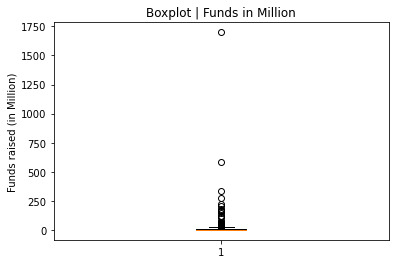

In [389]:
# Plot box plot for funds in million
figure = plt.boxplot(startup_data.Funds_in_Million)
plt.title('Boxplot | Funds in Million')
plt.ylabel("Funds raised (in Million)")

plt.show()

In [390]:
# get the lower_fence from the box plot

figure['caps'][0].get_data()[1][1]

0.005

In [391]:
# find IQR and first, second, and third quartiles.

IQR = stats.iqr(startup_data['Funds_in_Million'], interpolation='midpoint')
Q1 = np.quantile(startup_data['Funds_in_Million'], .25)
Q2 = np.quantile(startup_data['Funds_in_Million'], .50)
Q3 = np.quantile(startup_data['Funds_in_Million'], .75)

In [392]:
# find the upper fence

upper_fence = Q3 + 3*IQR
print('IQR: ',IQR.round(4))
print('Upper Fence: ',upper_fence.round(4))

IQR:  8.7045
Upper Fence:  35.5885


In [393]:
# so drop the values above the upper fence as those are outliers.

outliers = startup_data[startup_data['Funds_in_Million']> upper_fence]
outliers

,index,Startup,Product,Funding,Event,Result,OperatingState,new_Funding,Funds_in_Million
21,40,Artsy,artsy.net,$50.9M,Disrupt NYC 2010,Contestant,Operating,5.090000e+07,50.9
27,49,Badgeville,badgeville.com,$40M,Disrupt SF 2010,Finalist,Acquired,4.000000e+07,40.0
33,56,Betterment,betterment.com,$205M,Disrupt NYC 2010,Finalist,Operating,2.050000e+08,205.0
71,113,Cloudflare,cloudflare.com,$182.1M,Disrupt SF 2010,Runner up,Operating,1.821000e+08,182.1
84,130,CrowdFlower Inc.,crowdflower.com,$38M,TC50 2009,Contestant,Operating,3.800000e+07,38.0
85,132,Cubic Telecom,cubictelecom.com,$37.1M,TC40 2007,Contestant,Operating,3.710000e+07,37.1
87,138,DataSift,datasift.com,$72M,Disrupt SF 2010,Finalist,Operating,7.200000e+07,72.0
88,139,DataXu,dataxu.com,$64M,TC50 2009,Contestant,Operating,6.400000e+07,64.0
102,154,Dropbox,dropbox.com,$1.7B,TC50 2008,Contestant,Operating,1.700000e+09,1700.0
127,188,Fitbit,fitbit.com,$66M,TC50 2008,Finalist,Ipo,6.600000e+07,66.0


In [394]:
# plot the distributions without outliers

startup_data.drop(startup_data[startup_data.Funds_in_Million > upper_fence].index, inplace = True)


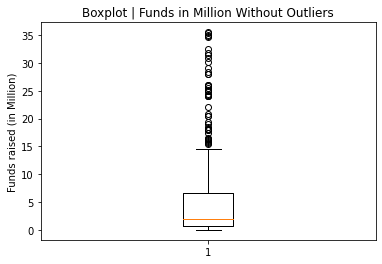

In [395]:
# Plot box plot for funds in million
figure = plt.boxplot(startup_data.Funds_in_Million)
plt.title('Boxplot | Funds in Million Without Outliers')
plt.ylabel("Funds raised (in Million)")

plt.show()

In [396]:
startup_data.OperatingState.value_counts()

Operating    294
Acquired      60
Closed        57
Ipo            1
Name: OperatingState, dtype: int64

<AxesSubplot:title={'center':'Count of OperatingState'}>

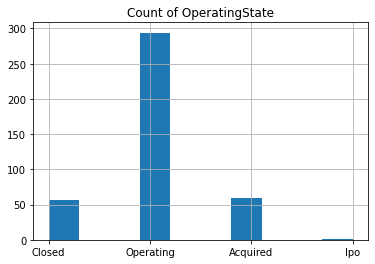

In [397]:
# Check frequency of the OperatingState features clases

plt.subplots(figsize=(6,4))
plt.title('Count of OperatingState')
startup_data.OperatingState.hist()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution Plot for Funds in Million'}, xlabel='Funds_in_Million', ylabel='Density'>

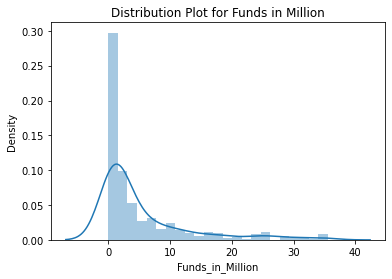

In [398]:
# plot distribution plot for Funds in million

plt.title('Distribution Plot for Funds in Million')
sns.distplot(startup_data.Funds_in_Million)

In [399]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [400]:
startup_data.drop(['new_Funding'],axis =1, inplace=True)
cont_var = startup_data.select_dtypes(include = ['float64'])

In [401]:
cont_var.apply(continuous_var_summary)

,Funds_in_Million
N,412.000000
NMISS,0.000000
SUM,2182.503900
MEAN,5.297340
MEDIAN,2.000000
STD,7.667340
VAR,58.788109
MIN,0.005000
P1,0.020000
P5,0.082910


* Here we can see that almost 75% data have less than 6.55 million raised funds, but the maximum is 35.5

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


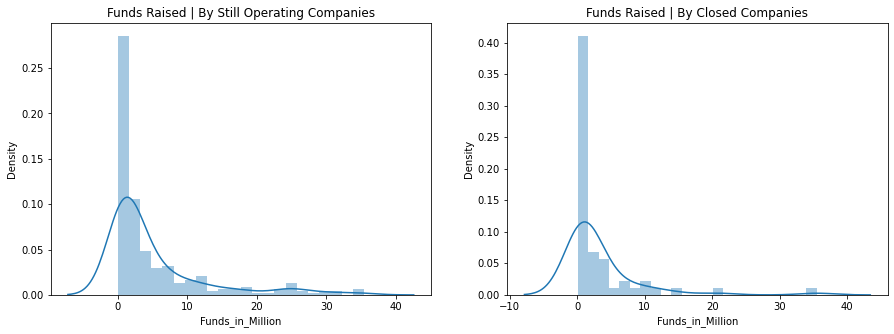

In [403]:
# plot distribution plot for the companies that are still operating or closed

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(startup_data.loc[startup_data.OperatingState == 'Operating', 'Funds_in_Million'], ax = ax[0])
sns.distplot(startup_data.loc[startup_data.OperatingState =='Closed', 'Funds_in_Million'], ax = ax[1])

ax[0].set_title('Funds Raised | By Still Operating Companies')
ax[1].set_title('Funds Raised | By Closed Companies')
plt.show()

## Statistical Analysis

#### 1. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down? Write the null hypothesis and alternative hypothesis. Test for significance and conclusion

In [404]:
# import neccessary packages
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.power import ttest_power

In [405]:
# we will use two sample t_test

#group 1
operating_df = startup_data['Funds_in_Million'][startup_data['OperatingState']=='Operating'].values

#group 2
closed_df = startup_data['Funds_in_Million'][startup_data['OperatingState']=='Closed'].values

### Using t-test

* Null hypothesis ||  $ H_{0} = $ There is no significant difference between the means of two groups
* Alternate hypothesis ||  $ H_{a} = $ There is significantdifference between the means of two groups

In [407]:
# null hypothesis H0: There is no significant difference between Funds raised | both groups have same mean
# alternate hypothesis Ha: There is a difference between Fund raised by the companies that are still operating
#vs that closed down | both groups have different mean

# level of significance is 95 %
# its a two tail test so,
alpha = 0.05
t_statistic, p_value = ttest_ind(operating_df, closed_df)
print('t_statistic: ',t_statistic.round(4),'|| p_value: ', p_value.round(4))
print('')
if p_value > alpha:
    print('Accept the Null hypothesis || Both groups have same mean')
else:
    print('Reject the Null hypothesis || Both groups have different mean')

t_statistic:  1.7539 || p_value:  0.0803

Accept the Null hypothesis || Both groups have same mean


### Using z-test

In [408]:
t_statistic, p_value = ztest(operating_df, closed_df)
print('t_statistic: ',t_statistic.round(4),'|| p_value: ', p_value.round(4))
print('')
if p_value > alpha:
    print('Accept the Null hypothesis || Both groups have same mean')
else:
    print('Reject the Null hypothesis || Both groups have different mean')

t_statistic:  1.7539 || p_value:  0.0794

Accept the Null hypothesis || Both groups have same mean


### [ From the above two tests, we can state that there is no significant difference between the Funds raised by the companies that are still operating vs that closed down.]

#### 2. Copy the original data into another dataframe

In [411]:
# Copy the original data into another dataframe
startup_data_copy = startup_data.copy(deep = True)
startup_data_copy.head()

,index,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_Million
0,1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
1,3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
2,5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
3,6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
4,10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


#### 3. Check frequency distribution of Result variable.

In [413]:
startup_data_copy['Result'].value_counts()

Contestant         293
Finalist            59
Winner              21
Audience choice     21
Runner up           18
Name: Result, dtype: int64

### [ From the above frequency distribution, total 21 are Winners and 18 are Runner up]

#### 4. Calculate percentage of winners that are still operating and percentage of contestants that are still operating

In [417]:
# overall data that are wtill operating

df = startup_data_copy[startup_data_copy['OperatingState']=='Operating']

In [420]:
df.Result.value_counts()

Contestant         200
Finalist            43
Audience choice     19
Runner up           17
Winner              15
Name: Result, dtype: int64

In [476]:
# percentage of winners that are still operating
# Include all the Results except Contestants to Winners count

total_win = startup_data_copy['Result'].value_counts()[1:].sum()
win = df.Result.value_counts()[1:].sum()

print('Percentage of winners that are still operating is: %1.2f '%((win/total_win)*100))

Percentage of winners that are still operating is: 78.99 


In [478]:
# percentage of contestants that are still operating

total_cont = startup_data_copy['Result'].value_counts()['Contestant']
cont = df.Result.value_counts()['Contestant']

print('Percentage of contestants that are still operating is: %1.2f '%((cont/total_cont)*100))

Percentage of contestants that are still operating is: 68.26 


#### 5. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants: 
* Write the null hypothesis and alternative hypothesis.
* Test for significance and conclusion.

### Using z-test for proportion

* Null hypothesis ||  $ H_{0} = $ The proportion is same for both the categories i.e., Winners & Contestants for the companies that are operating.
* Alternate hypothesis ||  $ H_{a} = $ There is a significant difference in the proportion of the two categories.

In [479]:
# import ztest proportions package
from statsmodels.stats.proportion import proportions_ztest

In [488]:
# level of significance, 95 %
# so value of alpha be 0.05

alpha = 0.05
test_statistic, p_value = proportions_ztest([cont, win], [total_cont, total_win])

print('test_statistic: ',test_statistic.round(4),'|| p_value: ', p_value.round(4))
print('')
if p_value > alpha:
    print('Accept the Null hypothesis || The proportion is same for both categories')
else:
    print('Reject the Null hypothesis || The difference in proportion for both categories is significant')

test_statistic:  -2.1839 || p_value:  0.029

Reject the Null hypothesis || The difference in proportion for both categories is significant


### [ We have enough evidence to state that fund raised by the companies is not a deciding factor to state whether a company will remail operational or close down]

#### 6. Check distribution of the Event variable. 
#### Select only the Event that has disrupt keyword from 2013 onwards.

In [500]:
# filter out the data of event with year > 2012 i.e. from 2013 onwards

startup_data_copy['Event'].apply(lambda x: 'Disrupt' in x and int(x[-4:])> 2012)

0       True
1       True
2      False
3      False
4      False
       ...  
438    False
441    False
442    False
444     True
445    False
Name: Event, Length: 412, dtype: bool

In [501]:
Event_df = startup_data_copy.Event[startup_data_copy['Event'].apply(lambda x: 'Disrupt' in x and int(x[-4:])> 2012)]

In [503]:
Event_df.value_counts() # all the events that has disrupt keyword and from 2013 onwards

Disrupt NY 2015        21
Disrupt NYC 2013       20
Disrupt SF 2013        20
Disrupt SF 2014        19
Disrupt SF 2015        19
Disrupt SF 2016        17
Disrupt NY 2016        16
Disrupt NYC 2014       16
Disrupt London 2015    12
Disrupt EU 2014        10
Disrupt London 2016    10
Disrupt EU 2013         9
Name: Event, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


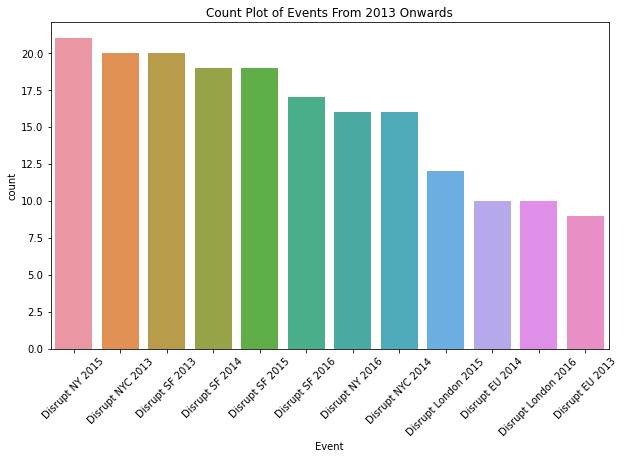

In [516]:
# plot the distributions

plt.subplots(figsize=(10,6))
plt.title('Count Plot of Events From 2013 Onwards')
plt.xticks(rotation=45)
sns.countplot(Event_df , order=Event_df.value_counts().index);

#### 7. Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 2013 onwards

In [524]:
# make groups for the three events NY, SF, and EU from 2013 onwards

events = startup_data_copy[startup_data_copy['Event'].apply(lambda x: 'Disrupt' in x and int(x[-4:])> 2012)]


In [536]:
NY = events.Funds_in_Million[events.Event.apply(lambda x: 'NY' in x)]
SF = events.Funds_in_Million[events.Event.apply(lambda x: 'SF' in x)]

# Considering London and EU in same group

EU = events.Funds_in_Million[events.Event.apply(lambda x: 'EU' in x or 'London' in x)]

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

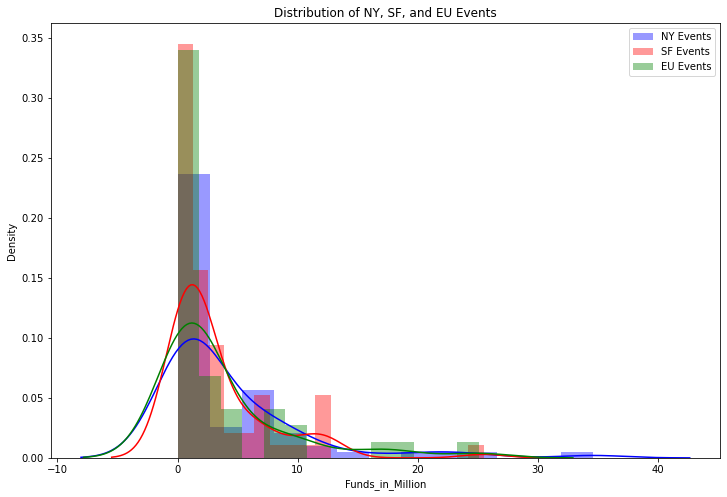

In [550]:

plt.subplots(figsize=(12,8))
plt.title('Distribution of NY, SF, and EU Events')
sns.distplot(NY, color = 'Blue', label = 'NY Events')
sns.distplot(SF, color = 'Red', label = 'SF Events')
sns.distplot(EU, color = 'Green', label = 'EU Events')
plt.legend()
plt.show()

### The distributions are seems to be similar.
### We will do ANOVA test to check whether the fund raised by all the three events are same or not.

### Using ANOVA

* Null hypothesis ||  $ H_{0} = $ The average fund raised by the three events are same.
* Alternate hypothesis ||  $ H_{a} = $ The average fund raised by the three events are not same..

In [552]:
# One way ANOVA test
# import neccessary packages

from scipy.stats import f_oneway

# level of significance is 95 %
# two tail test

alpha = 0.05

f_stat, p_value = f_oneway(NY, SF, EU)

In [553]:
print('f_stat: ',f_stat.round(4),'|| p_value: ', p_value.round(4))
print('')
if p_value > alpha:
    print('Accept the Null hypothesis || The proportion is same for both categories')
else:
    print('Reject the Null hypothesis || The difference in proportion for both categories is significant')

f_stat:  0.7171 || p_value:  0.4895

Accept the Null hypothesis || The proportion is same for both categories


### [From the distribution plot and ANOVA test, we have enough evidence to state that funds raised by the three cities or events is same.]

The funding raised by the companies within all categories are almost same. So, its not a deciding factor whether a company will remain in operating state or will be closed.

Following data points will be required for detailed analysis of any startup:
* Founding Year
* Domain ------such as ed-tech, ecommerce, technical consultancy, etc.
* Yearly Revenue
* Customer based/ product based service
* Country
* Closing Year

This will hellp us to determine country wise which type of startup ideas are more likely to be in operating state or closed in the future.